# Logistic Regression

### Import All Libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics 


### Load Dataset

In [3]:
data = sns.load_dataset('geyser')
data.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


### Label Encoding

In [4]:
# data['kind'] = LabelEncoder().fit_transform(data['kind'])
data['kind']=data['kind'].replace('long', 1)
data['kind']=data['kind'].replace('short', 0)
data.head()

,duration,waiting,kind
0,3.600,79,1
1,1.800,54,0
2,3.333,74,1
3,2.283,62,0
4,4.533,85,1


In [5]:
rows, col = data.shape
print('Rows: ', rows, '\nColumns: ', col)
print('Size: ',data.size)

Rows:  272 
Columns:  3
Size:  816


In [6]:
data.nunique()


duration    126
waiting      51
kind          2
dtype: int64

In [7]:
data.isnull().sum()

duration    0
waiting     0
kind        0
dtype: int64

In [8]:
corr = data.corr()
corr

,duration,waiting,kind
duration,1.000000,0.900811,0.932612
waiting,0.900811,1.000000,0.907299
kind,0.932612,0.907299,1.000000


<AxesSubplot:>

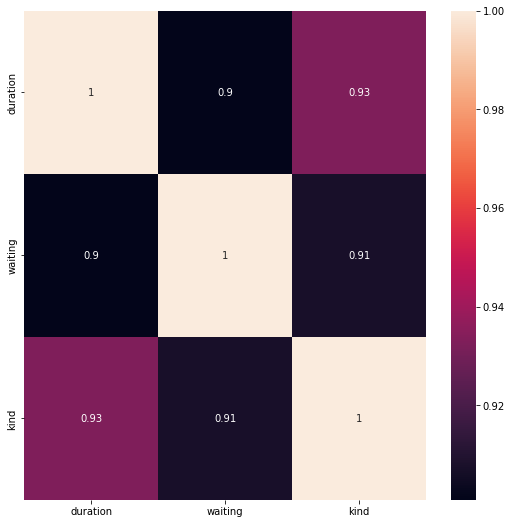

In [9]:
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot=True)

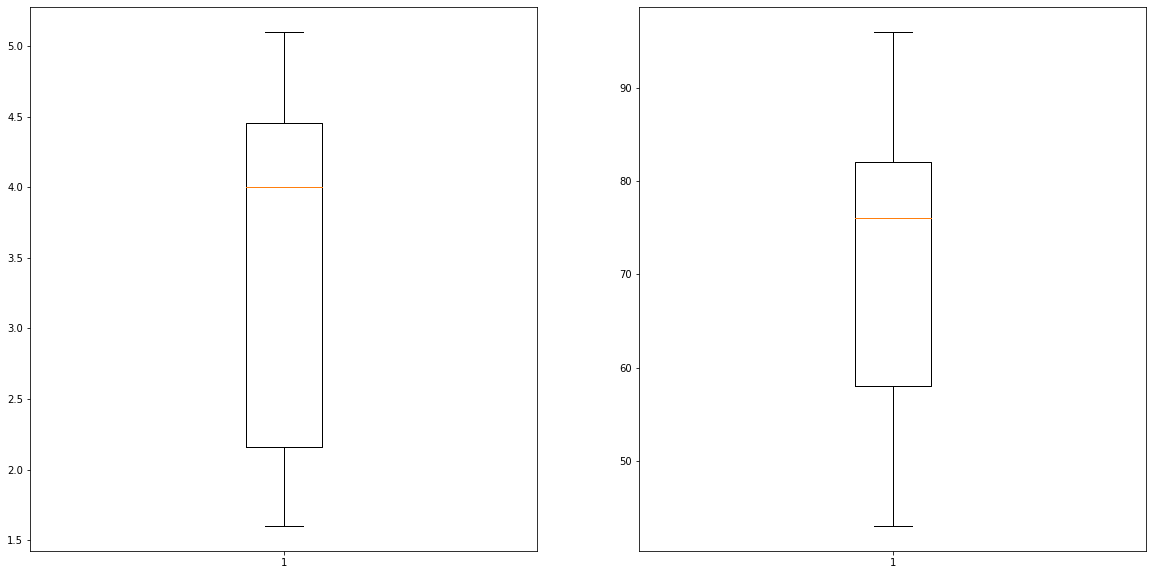

In [19]:
color = sns.color_palette()
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.boxplot(data['duration'])
plt.subplot(1,2,2)
plt.boxplot(data['waiting'])
plt.show()

In [ ]:
px.bar(data, data['kind'], data['waiting'], color='duration')

In [ ]:
px.scatter(data, data['duration'], data['waiting'], color='kind')
# px.scatter_3d(data, data['duration'], data['waiting'], data['kind'])

### Logistic Regression

In [ ]:
X = data[['duration']]
y = data[['kind']]
X.head()

,duration
0,3.600
1,1.800
2,3.333
3,2.283
4,4.533


### Split Data in training & testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X Train: ', x_train.shape)
print('X test: ', x_test.shape)
print('y Train: ', y_train.shape)
print('y Test: ', x_test.shape)

X Train:  (217, 1)
X test:  (55, 1)
y Train:  (217, 1)
y Test:  (55, 1)


### Model Traning

In [ ]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
print('Model is trained Successfully...')

Model is trained Successfully...


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Predicting Values

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
pd.DataFrame({'Actual':y_test.values.reshape(55,), 'Predicted':y_pred.reshape(55,)}).head(10)

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


### Generating plot

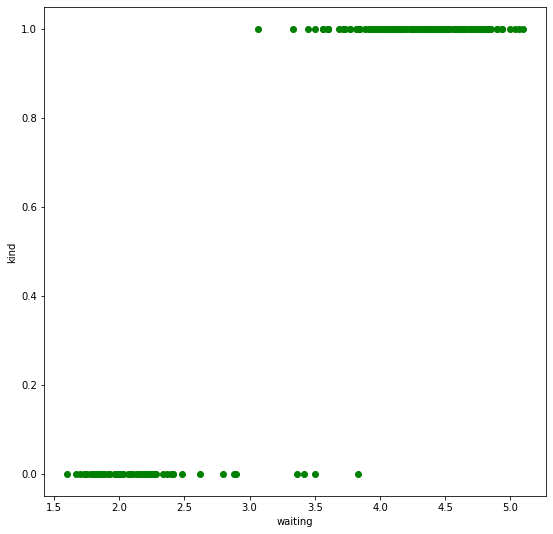

In [ ]:
plt.figure(figsize=(9,9))
plt.scatter(x_train, y_train, color='green')
# plt.plot(x_train, model.predict(x_train), color='red')
plt.xlabel('waiting')
plt.ylabel('kind')
plt.show()

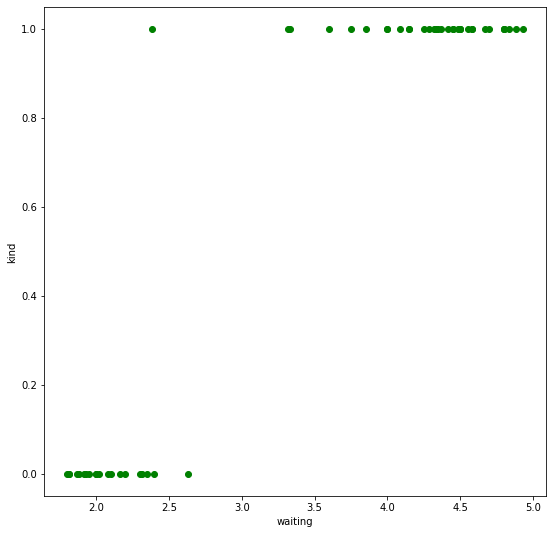

In [ ]:
plt.figure(figsize=(9,9))
plt.scatter(x_test, y_test, color='green')
# plt.plot(x_train, model.predict(x_train), color='red')
plt.xlabel('waiting')
plt.ylabel('kind')
plt.show()

### Accuracy

In [ ]:
print('Accuracy on training data: ', model.score(x_train, y_train) * 100)
print('Accuracy on testing data: ', model.score(x_test, y_test) * 100)

Accuracy on training data:  97.6958525345622
Accuracy on testing data:  98.18181818181819


### Accuracy Score

In [ ]:
print('Accuracy : ', accuracy_score(y_test, y_pred) * 100)

Accuracy :  98.18181818181819


### Mean Absolute Error 

In [ ]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(x_test, model.predict(x_test)))

Mean Absolute Error:  2.8636181818181816


### Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[20,  0],
       [ 1, 34]], dtype=int64)

### Coefficient & Intercept

In [ ]:
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficient:  [[3.61707361]]
Intercept:  [-11.42135662]
